In [2]:
#  Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import joblib 

In [33]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

In [4]:
# Preview Data

hd = pd.read_csv("MGH_PredictionDataSet.csv")

In [5]:
hd.shape

(4240, 16)

In [6]:
hd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sex              4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


                             DEALING WITH NULL VALUES

In [7]:
# dropping null values, hd_new = hd.dropna()
# filling nulls with a constant value( if every column was a binary - 0,1) hd_constantfill = hd_cf = hd.fillna()
# hd_ffill = hd.fillna(method = "ffill")
# hd_jeff = hd.fillna(method = "bfill")
# hd['Age'] = hd['Age'].fillna(hd['Age'].mean())

hd_new = hd.dropna()

In [8]:
hd_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3658 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sex              3658 non-null   int64  
 1   age              3658 non-null   int64  
 2   education        3658 non-null   float64
 3   currentSmoker    3658 non-null   int64  
 4   cigsPerDay       3658 non-null   float64
 5   BPMeds           3658 non-null   float64
 6   prevalentStroke  3658 non-null   int64  
 7   prevalentHyp     3658 non-null   int64  
 8   diabetes         3658 non-null   int64  
 9   totChol          3658 non-null   float64
 10  sysBP            3658 non-null   float64
 11  diaBP            3658 non-null   float64
 12  BMI              3658 non-null   float64
 13  heartRate        3658 non-null   float64
 14  glucose          3658 non-null   float64
 15  TenYearCHD       3658 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 485.8 KB


In [9]:
# Encoding Relevant Columns

# hd['age_encoded'] =LabelEncoder().fit_transform(hd["age"])
# hd['currentmokerS_encoded'] =LabelEncoder().fit_transform(hd["currentSmoker"])
# hd['cigsPerDay_encoded'] =LabelEncoder().fit_transform(hd["cigsPerDay"])
# hd['sex_encoded'] =LabelEncoder().fit_transform(hd["sex"])
# hd['education_encoded'] =LabelEncoder().fit_transform(hd["education"])
# hd['totChol_encoded'] =LabelEncoder().fit_transform(hd["totChol"])
# hd['sysBP_encoded'] =LabelEncoder().fit_transform(hd["sysBP"])
# hd['diaBP_encoded'] =LabelEncoder().fit_transform(hd["diaBP"])
# hd[' BMI_encoded'] =LabelEncoder().fit_transform(hd["BMI"])
# hd[' heartRate_encoded'] =LabelEncoder().fit_transform(hd["heartRate"])
# hd[' diabetes_encoded'] =LabelEncoder().fit_transform(hd["diabetes"])




In [10]:
# Correlation MATRIX

values = ["age","sex","education","currentSmoker","cigsPerDay","diabetes","totChol","sysBP","diaBP","BMI","heartRate","prevalentHyp","prevalentStroke",
          "BPMeds","glucose","TenYearCHD"]

correlation_matrix = hd_new[values].corr(method = "pearson")

correlation_matrix

,age,sex,education,currentSmoker,cigsPerDay,diabetes,totChol,sysBP,diaBP,BMI,heartRate,prevalentHyp,prevalentStroke,BPMeds,glucose,TenYearCHD
age,1.000000,-0.024412,-0.159499,-0.210771,-0.189295,0.109092,0.268252,0.388267,0.208283,0.137511,-0.002722,0.306239,0.050893,0.134732,0.118349,0.233983
sex,-0.024412,1.000000,0.017729,0.206114,0.330322,0.013819,-0.070321,-0.045358,0.051872,0.073111,-0.115285,0.001424,-0.002312,-0.052124,0.002940,0.091688
education,-0.159499,0.017729,1.000000,0.025251,0.013790,-0.039627,-0.013522,-0.124360,-0.058059,-0.137555,-0.064214,-0.078828,-0.030386,-0.013739,-0.031998,-0.063279
currentSmoker,-0.210771,0.206114,0.025251,1.000000,0.773913,-0.041849,-0.051034,-0.134428,-0.115955,-0.159821,0.050841,-0.108078,-0.038150,-0.051923,-0.053242,0.019165
cigsPerDay,-0.189295,0.330322,0.013790,0.773913,1.000000,-0.036961,-0.030400,-0.094781,-0.056746,-0.087395,0.064030,-0.070460,-0.036286,-0.046504,-0.053726,0.052014
diabetes,0.109092,0.013819,-0.039627,-0.041849,-0.036961,1.000000,0.048451,0.102552,0.050686,0.089009,0.060984,0.080556,0.009625,0.049066,0.614820,0.093431
totChol,0.268252,-0.070321,-0.013522,-0.051034,-0.030400,0.048451,1.000000,0.219925,0.174422,0.121056,0.093053,0.166655,0.012736,0.094083,0.049884,0.091338
sysBP,0.388267,-0.045358,-0.124360,-0.134428,-0.094781,0.102552,0.219925,1.000000,0.786669,0.330917,0.184797,0.697675,0.061070,0.271263,0.134651,0.222821
diaBP,0.208283,0.051872,-0.058059,-0.115955,-0.056746,0.050686,0.174422,0.786669,1.000000,0.385348,0.178744,0.617734,0.055834,0.199630,0.063540,0.150124
BMI,0.137511,0.073111,-0.137555,-0.159821,-0.087395,0.089009,0.121056,0.330917,0.385348,1.000000,0.074131,0.302949,0.036496,0.105642,0.083683,0.082055


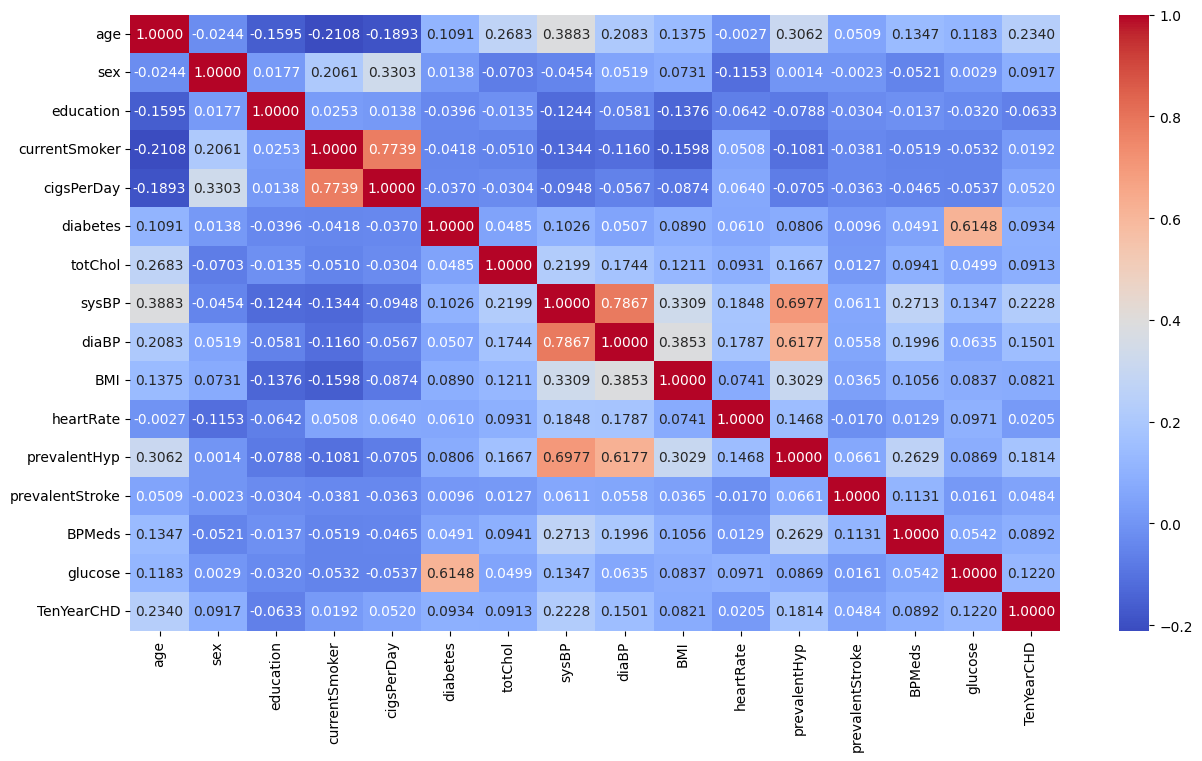

In [11]:
plt.figure(figsize=(15,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.4f')
plt.show()

In [12]:
# Splitting the Data: Feature (X) AND output(y)

Features = ["age","sex","currentSmoker","cigsPerDay","diabetes","totChol","sysBP","BMI","prevalentHyp","BPMeds","glucose"]

X = hd_new[Features]
y = hd_new["TenYearCHD"]

In [13]:
# UNIQUE VALUES
# "age","sex","currentSmoker","cigsPerDay","diabetes","totChol","sysBP","BMI","prevalentHyp","BPMeds","glucose"

In [34]:
np.sort(hd["age"].unique()) # THIS IS NUMERICAL COMPUTATION

array([32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48,
       49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65,
       66, 67, 68, 69, 70])

In [15]:
hd["sex"].unique()

array([1, 0])

In [16]:
hd["currentSmoker"].unique()

array([0, 1])

In [17]:
hd["cigsPerDay"].unique()

array([ 0., 20., 30., 23., 15.,  9., 10.,  5., 35., 43.,  1., 40.,  3.,
        2., nan, 12.,  4., 18., 25., 60., 14., 45.,  8., 50., 13., 11.,
        7.,  6., 38., 29., 17., 16., 19., 70.])

In [18]:
hd["diabetes"].unique()

array([0, 1])

In [19]:
hd["totChol"].unique()

array([195., 250., 245., 225., 285., 228., 205., 313., 260., 254., 247.,
       294., 332., 226., 221., 232., 291., 190., 185., 234., 215., 270.,
       272., 295., 209., 175., 214., 257., 178., 233., 180., 243., 237.,
        nan, 311., 208., 252., 261., 179., 194., 267., 216., 240., 266.,
       255., 220., 235., 212., 223., 300., 302., 248., 200., 189., 258.,
       202., 213., 183., 274., 170., 210., 197., 326., 188., 256., 244.,
       193., 239., 296., 269., 275., 268., 265., 173., 273., 290., 278.,
       264., 282., 241., 288., 222., 303., 246., 150., 187., 286., 154.,
       279., 293., 259., 219., 230., 320., 312., 165., 159., 174., 242.,
       301., 167., 308., 325., 229., 236., 224., 253., 464., 171., 186.,
       227., 249., 176., 163., 191., 263., 196., 310., 164., 135., 238.,
       207., 342., 287., 182., 352., 284., 217., 203., 262., 129., 155.,
       323., 206., 283., 319., 304., 340., 328., 280., 368., 218., 276.,
       339., 231., 198., 177., 201., 277., 184., 19

In [20]:
hd["sysBP"].unique()

array([106. , 121. , 127.5, 150. , 130. , 180. , 138. , 100. , 141.5,
       162. , 133. , 131. , 142. , 124. , 114. , 140. , 112. , 122. ,
       139. , 108. , 123.5, 148. , 132. , 137.5, 102. , 110. , 182. ,
       115. , 134. , 147. , 124.5, 153.5, 160. , 153. , 111. , 116.5,
       206. ,  96. , 179.5, 119. , 116. , 156.5, 145. , 143.5, 158. ,
       157. , 126.5, 136. , 154. , 190. , 107. , 112.5, 164.5, 138.5,
       155. , 151. , 152. , 179. , 113. , 200. , 132.5, 126. , 123. ,
       141. , 135. , 187. , 127. , 160.5, 105. , 109. , 128. , 118. ,
       109.5, 117.5, 149. , 180.5, 136.5, 212. , 125. , 191. , 121.5,
       173. , 144. , 129.5, 117. , 144.5, 170. , 137. ,  94. , 119.5,
       143. , 166. , 139.5, 177.5, 129. , 159. , 130.5, 107.5, 189. ,
       168. , 197.5, 146. , 174. , 122.5,  98. , 131.5, 195. , 101. ,
       158.5,  97. , 151.5,  97.5, 120. , 204. , 157.5, 140.5, 171. ,
       215. ,  95. , 156. , 165. , 178. , 146.5, 113.5, 188. , 197. ,
        90. , 152.5,

In [21]:
hd["BMI"].unique()

array([26.97, 28.73, 25.34, ..., 26.7 , 43.67, 20.91], shape=(1365,))

In [22]:
hd["prevalentHyp"].unique()

array([0, 1])

In [23]:
hd["BPMeds"].unique()

array([ 0.,  1., nan])

In [24]:
hd["glucose"].unique()

array([ 77.,  76.,  70., 103.,  85.,  99.,  78.,  79.,  88.,  61.,  64.,
        84.,  nan,  72.,  89.,  65., 113.,  75.,  83.,  66.,  74.,  63.,
        87., 225.,  90.,  80., 100., 215.,  98.,  62.,  95.,  94.,  55.,
        82.,  93.,  73.,  45., 202.,  68.,  97., 104.,  96., 126., 120.,
       105.,  71.,  56.,  60., 117., 102.,  58.,  92., 109.,  86., 107.,
        54.,  67.,  69.,  57.,  91., 132., 150.,  59.,  81., 115., 140.,
       112., 118., 143., 114., 160., 110., 123., 108., 145., 122., 137.,
       106., 127., 205., 130., 101.,  47.,  53., 216., 163., 144., 116.,
       121., 172., 124., 111.,  40., 186., 223., 325.,  44., 156., 268.,
        50., 274., 292., 255., 136., 206., 131., 148., 297.,  43., 173.,
        48., 386., 155., 147., 170.,  52., 320., 254., 394., 270., 244.,
       183., 142., 119., 135., 167., 207., 129., 177., 250., 294., 166.,
       125., 332., 368., 348., 248., 370., 193., 191., 256., 235., 210.,
       260.])

In [25]:
hd_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3658 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sex              3658 non-null   int64  
 1   age              3658 non-null   int64  
 2   education        3658 non-null   float64
 3   currentSmoker    3658 non-null   int64  
 4   cigsPerDay       3658 non-null   float64
 5   BPMeds           3658 non-null   float64
 6   prevalentStroke  3658 non-null   int64  
 7   prevalentHyp     3658 non-null   int64  
 8   diabetes         3658 non-null   int64  
 9   totChol          3658 non-null   float64
 10  sysBP            3658 non-null   float64
 11  diaBP            3658 non-null   float64
 12  BMI              3658 non-null   float64
 13  heartRate        3658 non-null   float64
 14  glucose          3658 non-null   float64
 15  TenYearCHD       3658 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 485.8 KB


In [26]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state = 42,stratify=y)


In [27]:
# Define and Train the MOdel

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # learning from the scaler
X_test = scaler.transform(X_test)  # applying the fit/settings learned

modelLR = LogisticRegression(max_iter=2000)
modelLR.fit(X_train,y_train)

y_pred = modelLR.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       621
           1       0.71      0.14      0.23       111

    accuracy                           0.86       732
   macro avg       0.79      0.56      0.58       732
weighted avg       0.84      0.86      0.82       732



In [28]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.860655737704918


In [29]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

modelRF = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
modelRF.fit(X_train, y_train)

y_pred = modelRF.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       621
           1       0.54      0.06      0.11       111

    accuracy                           0.85       732
   macro avg       0.70      0.53      0.52       732
weighted avg       0.81      0.85      0.80       732



In [30]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

modelDT = DecisionTreeClassifier(random_state=42, max_depth=3)
modelDT.fit(X_train, y_train)

y_pred = modelDT.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.97      0.91       621
           1       0.47      0.14      0.22       111

    accuracy                           0.85       732
   macro avg       0.67      0.56      0.57       732
weighted avg       0.80      0.85      0.81       732



In [31]:
# Linear Regression Performed the best of the 3 models.
# Save the Model

joblib.dump(modelLR,"TenYearCHD.joblib")
joblib.dump(scaler,"scaler.joblib")

['scaler.joblib']

In [35]:
# prediction step

import joblib
import pandas as pd
from sklearn.preprocessing import StandardScaler


modelLR = joblib.load('TenYearCHD.joblib')
scaler = joblib.load('scaler.joblib')

# create lib exactly the way you trained in that order, insert own realistic values

new_data = pd.DataFrame({
    "age": [70, 55, 35, 32],
    "sex": [0, 1, 0, 1],  # 0=Female, 1=Male
    "currentSmoker": [0, 1, 0, 1],  # 0=No, 1=Yes
    "cigsPerDay": [0, 20, 0, 20],  # Number of cigarettes per day
    "diabetes": [1, 1, 0, 0],  # 0=No, 1=Yes
    "totChol": [245, 180, 220, 165],  # Total cholesterol (mg/dL)
    "sysBP": [160, 130, 145, 110],  # Systolic blood pressure (mmHg)
    "BMI": [28.2, 28.8, 25.1, 24.0],  # Body Mass Index
    "prevalentHyp": [1, 1, 0, 0],  # 0=No hypertension, 1=Has hypertension
    "BPMeds": [1, 0, 1, 0],  # 0=Not on BP medication, 1=On BP medication
    "glucose": [110, 100, 95, 78]  # Fasting glucose (mg/dL)
})
print("New Data:")
print(new_data)

#reorder data
new_data = new_data[["age","sex","currentSmoker","cigsPerDay","diabetes","totChol","sysBP","BMI","prevalentHyp","BPMeds","glucose"]]
print(new_data)

# Scale the new data here
X_new = scaler.transform(new_data)
print("Scaled New Data Shape:", X_new.shape)

# Make predictions at this stage: based on the scaled data
predictions = modelLR.predict(X_new)
prediction_probs = modelLR.predict_proba(X_new)[:, 1] # Probability of CHD=1

# Combine predictions with original data
new_data_with_predictions = new_data.copy()
new_data_with_predictions['predicted_TenYearCHD'] = predictions
new_data_with_predictions['TenYearCHD_probability'] = prediction_probs

# Display results
print("\nPrediction Results:")
print(new_data_with_predictions)

New Data:
   age  sex  currentSmoker  cigsPerDay  diabetes  totChol  sysBP   BMI  \
0   70    0              0           0         1      245    160  28.2   
1   55    1              1          20         1      180    130  28.8   
2   35    0              0           0         0      220    145  25.1   
3   32    1              1          20         0      165    110  24.0   

   prevalentHyp  BPMeds  glucose  
0             1       1      110  
1             1       0      100  
2             0       1       95  
3             0       0       78  
   age  sex  currentSmoker  cigsPerDay  diabetes  totChol  sysBP   BMI  \
0   70    0              0           0         1      245    160  28.2   
1   55    1              1          20         1      180    130  28.8   
2   35    0              0           0         0      220    145  25.1   
3   32    1              1          20         0      165    110  24.0   

   prevalentHyp  BPMeds  glucose  
0             1       1      110  
1  

c:\Users\ADMIN\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
